In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment
from chromalab.spectra import Spectra, Illuminant

In [3]:
from chromalab.inks import InkLibrary

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
wavelengths4 = np.arange(380, 781, 4)
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
premium_primaries = {}
with open(f'../data/nix/041024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        premium_primaries[name]  = spectra

In [7]:
Neugebauer(premium_primaries).mix(())

In [8]:
mets = {}
with open(f'../data/nix/10.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        mets[name]  = spectra

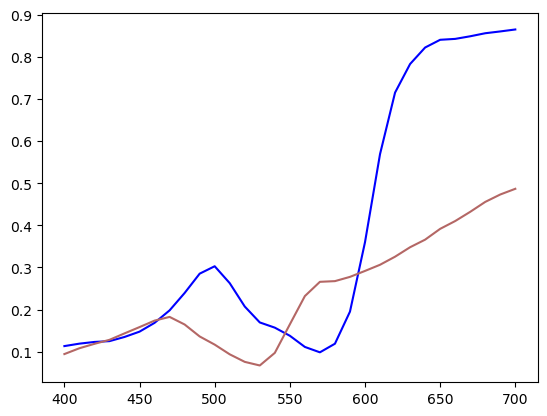

In [25]:
mets['TestOut '].plot(color='blue')
mets['TestIn'].plot()

In [17]:
perc1 = np.array((0.04, 0.0, 0.42, 0.66))
perc2 = np.array((0.24, 0.94, 0.06, 0.06))

In [26]:
data1 = mets['TestOut '].data
data2 = mets['TestIn'].data

In [31]:
for n in [0.1, 0.5, 1, 1.5, 2, 50]:
    neug = Neugebauer(premium_primaries, n=n)
    sample1 = neug.mix(perc1)
    sample2 = neug.mix(perc2)
#     Spectra(wavelengths=wavelengths10, data=sample1).plot(color='blue')
#     Spectra(wavelengths=wavelengths10, data=sample2).plot()
    score1 = np.sum(np.square((data1 - sample1)))
    score2 = np.sum(np.square((data2 - sample2)))
    print(n, "\t",round(score1,2), "\t" ,round(score2,2))


50 	 0.09 	 0.49
0.1 	 7.44 	 8.55
0.5 	 1.79 	 2.89
1 	 0.67 	 1.82
1.5 	 0.4 	 1.37
2 	 0.29 	 1.14
50 	 0.09 	 0.49


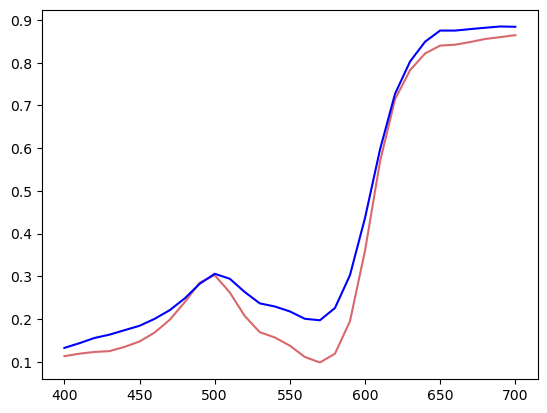

In [45]:
mets['TestOut '].plot()
neug = Neugebauer(premium_primaries, n=500)
sample1 = neug.mix(perc1)
Spectra(wavelengths=wavelengths10, data=sample1).plot(color='blue')


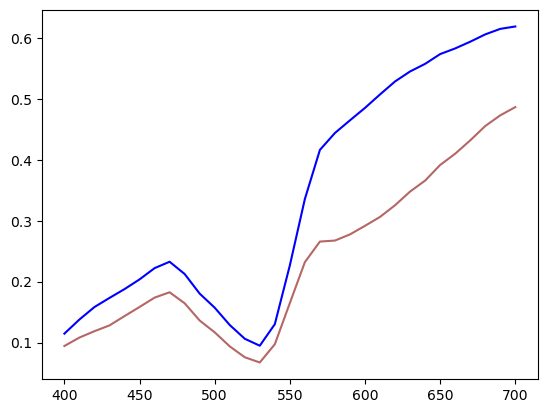

In [49]:
mets['TestIn'].plot()
neug = Neugebauer(premium_primaries, n=500)
sample2 = neug.mix(perc2)
Spectra(wavelengths=wavelengths10, data=sample2).plot(color='blue')
